In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.model_selection import train_test_split

In [233]:
hdb_resale_df = pd.read_csv(r'C:\Users\USER\Documents\Projects\Singapore Housing Resale Price\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')
hdb_resale_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [234]:
hdb_resale_df.groupby('flat_type')['resale_price'].mean()

flat_type
1 ROOM              196904.196721
2 ROOM              262325.383373
3 ROOM              339630.832073
4 ROOM              482108.158008
5 ROOM              579239.155717
EXECUTIVE           679978.440129
MULTI-GENERATION    823259.452055
Name: resale_price, dtype: float64

In [235]:
hdb_resale_df.groupby('flat_model')['resale_price'].mean().sort_values()

flat_model
2-room                    2.979231e+05
New Generation            3.558402e+05
Simplified                3.708525e+05
Model A2                  3.804691e+05
Standard                  4.209416e+05
Model A                   4.697578e+05
Improved                  4.944012e+05
Premium Apartment         5.236217e+05
Apartment                 6.633029e+05
Improved-Maisonette       7.028989e+05
Adjoined flat             7.119566e+05
3Gen                      7.133846e+05
Maisonette                7.270143e+05
Model A-Maisonette        7.517181e+05
DBSS                      7.599083e+05
Premium Maisonette        7.795000e+05
Multi Generation          8.232595e+05
Terrace                   8.537763e+05
Premium Apartment Loft    9.461125e+05
Type S1                   9.887030e+05
Type S2                   1.096663e+06
Name: resale_price, dtype: float64

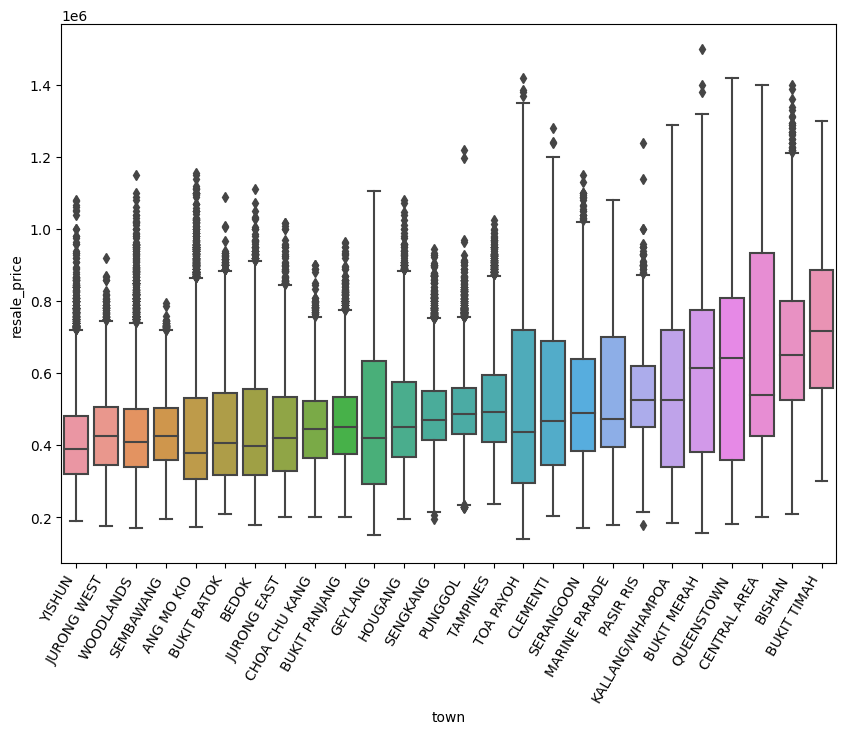

In [236]:
plt.figure(figsize=(10,7))
median_by_town = hdb_resale_df.groupby(['town'])['resale_price'].mean().sort_values(ascending=True)
town_plot = sns.boxplot(data=hdb_resale_df, x='town', y='resale_price',order=median_by_town.index)
town_plot.set_xticklabels(town_plot.get_xticklabels(), rotation=60, ha="right")
plt.show()

In [237]:
hdb_resale_df.groupby('town')['resale_price'].mean().sort_values()

town
YISHUN             411624.063159
JURONG WEST        428936.710773
WOODLANDS          432527.400295
SEMBAWANG          439745.551618
ANG MO KIO         441882.838268
BUKIT BATOK        443765.417414
BEDOK              445464.092422
JURONG EAST        445921.950092
CHOA CHU KANG      451315.028135
BUKIT PANJANG      464847.366920
GEYLANG            467459.526747
HOUGANG            479235.886918
SENGKANG           483680.213201
PUNGGOL            501696.749339
TAMPINES           511765.677077
TOA PAYOH          513540.017283
CLEMENTI           519875.815475
SERANGOON          522588.757774
MARINE PARADE      539772.438247
PASIR RIS          542292.630651
KALLANG/WHAMPOA    546253.905118
BUKIT MERAH        595678.998965
QUEENSTOWN         607419.457153
CENTRAL AREA       659904.400585
BISHAN             667864.051858
BUKIT TIMAH        723219.740995
Name: resale_price, dtype: float64

In [238]:
def preprocessing(df):
    #drop unused columns
    df = df.drop(columns=['month','block','street_name','lease_commence_date'])

    # convert lease to float number
    def lease_to_float(str):
        split =str.split()
        return int(split[0]) + int(split[-2])/12
    df.remaining_lease = df.remaining_lease.apply(lease_to_float)

    #convert storey range to the median of its range
    df.storey_range = df.storey_range.apply(lambda x: {'01 TO 03':2.0,
                                                       '04 TO 06':5.0,
                                                       '07 TO 09':8.0,
                                                       '10 TO 12':11.0,
                                                       '13 TO 15':14.0,
                                                       '16 TO 18':17.0,
                                                       '19 TO 21':20.0,
                                                       '22 TO 24':23.0,
                                                       '25 TO 27':26.0,
                                                       '28 TO 30':29.0,
                                                       '31 TO 33':32.0,
                                                       '34 TO 36':35.0,
                                                       '37 TO 39':38.0,
                                                       '40 TO 42':41.0,
                                                       '43 TO 45':44.0,
                                                       '46 TO 48':47.0,
                                                       '49 TO 51':50.0}[x])

    return df

x = preprocessing(hdb_resale_df)
x

,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price
0,ANG MO KIO,2 ROOM,11.0,44.0,Improved,61.333333,232000.0
1,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,60.583333,250000.0
2,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,62.416667,262000.0
3,ANG MO KIO,3 ROOM,5.0,68.0,New Generation,62.083333,265000.0
4,ANG MO KIO,3 ROOM,2.0,67.0,New Generation,62.416667,265000.0
...,...,...,...,...,...,...,...
157676,YISHUN,5 ROOM,8.0,121.0,Improved,62.833333,610000.0
157677,YISHUN,5 ROOM,5.0,122.0,Improved,63.083333,535000.0
157678,YISHUN,5 ROOM,5.0,129.0,Improved,62.416667,620000.0
157679,YISHUN,EXECUTIVE,5.0,164.0,Apartment,73.666667,960000.0


In [239]:
#split dataset into train,val and test
def split_df(df):
    y = df.pop('resale_price')
    X_train, X_val, y_train, y_val = train_test_split(df,y,test_size=0.3,random_state=1)
    X_val, X_test, y_val, y_test = train_test_split(X_val,y_val,test_size=0.5,random_state=2)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [240]:
def create_encoder(x,y):
    enc = ce.TargetEncoder()
    enc.fit(x,y)
    return enc

def pipeline(df,enc):
    df = enc.transform(df)
    return df

def create_data_splits(df):
    X_train, X_val, X_test, y_train, y_val, y_test = split_df(x)
    enc = create_encoder(X_train,y_train)
    X_train = pipeline(X_train,enc)
    X_test = pipeline(X_test,enc)
    X_val = pipeline(X_val,enc)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [241]:
X_train, X_val, X_test, y_train, y_val, y_test = create_data_splits(x)

In [247]:
from xgboost import XGBRegressor

boost = XGBRegressor(n_estimators=10000,
                     early_stopping_rounds=30,
                     learning_rate=0.1,
                     reg_lambda=0.1)
boost.fit(X_train,y_train,eval_set=[(X_val,y_val)])
score = boost.score(X_test,y_test)

[0]	validation_0-rmse:463878.36656
[1]	validation_0-rmse:419185.09034
[2]	validation_0-rmse:379121.96686
[3]	validation_0-rmse:343262.31279
[4]	validation_0-rmse:311009.79414
[5]	validation_0-rmse:282189.57407
[6]	validation_0-rmse:256445.32895
[7]	validation_0-rmse:233436.80044
[8]	validation_0-rmse:212992.63819
[9]	validation_0-rmse:194832.90627
[10]	validation_0-rmse:178793.61749
[11]	validation_0-rmse:164562.06727
[12]	validation_0-rmse:151968.43747
[13]	validation_0-rmse:140942.36983
[14]	validation_0-rmse:131187.91013
[15]	validation_0-rmse:122602.57192
[16]	validation_0-rmse:115082.36953
[17]	validation_0-rmse:108693.91633
[18]	validation_0-rmse:103189.29698
[19]	validation_0-rmse:98384.90954
[20]	validation_0-rmse:94104.36959
[21]	validation_0-rmse:90654.58964
[22]	validation_0-rmse:87576.19808
[23]	validation_0-rmse:84822.66350
[24]	validation_0-rmse:82477.68972
[25]	validation_0-rmse:80572.40918
[26]	validation_0-rmse:78961.84671
[27]	validation_0-rmse:77585.47447
[28]	valida

In [248]:
from sklearn.metrics import mean_squared_error

preds = boost.predict(X_test)
accuracy = mean_squared_error(preds,y_test,squared=False)
float(accuracy)

48837.421302149414